# Superstore Sales Analysis  
### **Full Data Manipulation + Visualization Project (Python + Pandas + NumPy + Matplotlib + SQL)**

This notebook performs an end-to-end analysis on the Superstore dataset using Python.  
You will learn:

1. Data Loading  
2. Data Cleaning  
3. Feature Engineering  
4. Exploratory Data Analysis (EDA)  
5. Data Manipulation (Pandas)  
6. Visualizations (Matplotlib)  
7. SQL vs Pandas Comparison  
8. Business Insights  

---

### **Dataset:** Superstore Sales Data  
### **Author:** Saikat Gayen  


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 1. Load Dataset


In [48]:
df = pd.read_csv("superstore.csv", encoding='latin1')

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. Data Cleaning  
We will:  
- Check shape  
- Check missing values  
- Check data types  
- Convert dates  
- Remove duplicates  


In [49]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

((9994, 21), None)

In [50]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [51]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)


In [52]:
# Convert date columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub-Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## 3. Feature Engineering  
We add:  
- **Profit Margin**  
- **Month**  
- **Year**  
- **Shipping_Delay**  

In [53]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year
df['Shipping_Delay'] = (df['Ship_Date'] - df['Order_Date']).dt.days

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Profit_Margin,Month,Year,Shipping_Delay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,11,2016,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,11,2016,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,6,2016,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,10,2015,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,10,2015,7


# 4. Exploratory Data Analysis (EDA)
---
### Let's explore:
- Summary stats  
- Best/worst categories  
- Profit distribution  
- Average shipping delay  


In [54]:
df.describe()


,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit,Profit_Margin,Month,Year,Shipping_Delay
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,0.120314,7.809686,2015.722233,3.958175
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-2.750000,1.000000,2014.000000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,0.075000,5.000000,2015.000000,3.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,0.270000,9.000000,2016.000000,4.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,0.362500,11.000000,2017.000000,5.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000,12.000000,2017.000000,7.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,0.466754,3.284654,1.123555,1.747567


In [55]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


## 5. Category-Level Analysis


In [56]:
category_sales = df.groupby('Category')['Sales'].sum()
category_profit = df.groupby('Category')['Profit'].sum()

category_sales, category_profit


(Category
 Furniture          741999.7953
 Office Supplies    719047.0320
 Technology         836154.0330
 Name: Sales, dtype: float64,
 Category
 Furniture           18451.2728
 Office Supplies    122490.8008
 Technology         145454.9481
 Name: Profit, dtype: float64)

## 6. Visualizations
### We will create:
- Sales by Category  
- Monthly Sales Trend  
- Profit by Region  
- Discount Distribution  
- Top 10 Products  


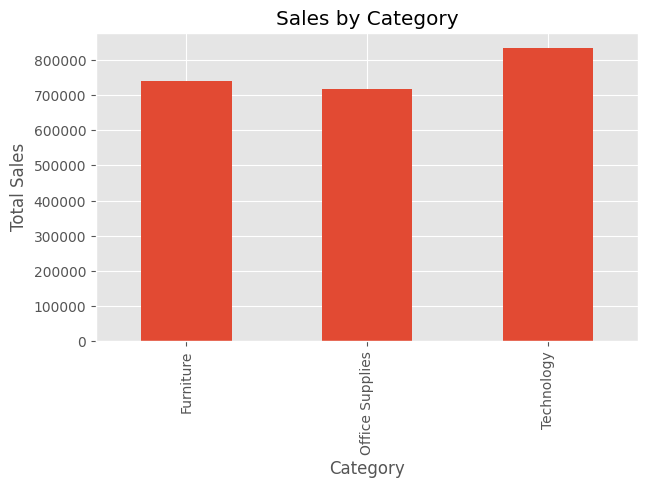

In [57]:
# 1. Sales by Category
category_sales.plot(kind='bar', figsize=(7,4))
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


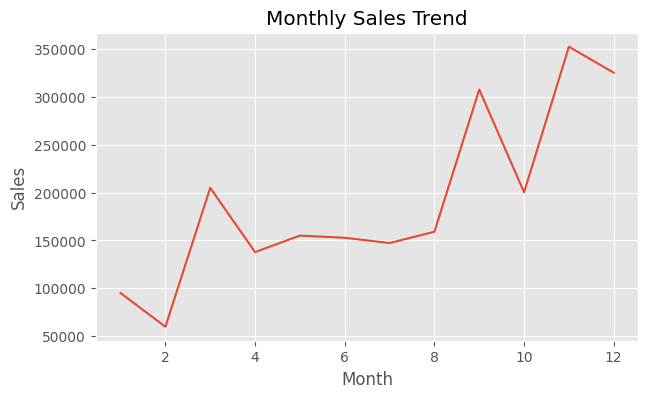

In [58]:
# 2. Monthly Sales Trend
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(7,4))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


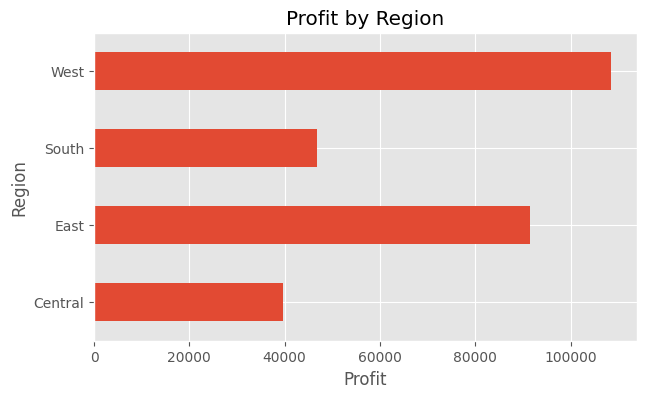

In [59]:
# 3. Profit by Region
region_profit = df.groupby('Region')['Profit'].sum()

region_profit.plot(kind='barh', figsize=(7,4))
plt.title("Profit by Region")
plt.xlabel("Profit")
plt.ylabel("Region")
plt.show()


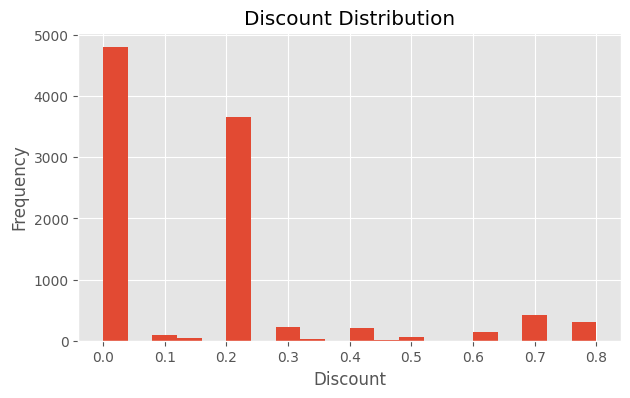

In [60]:
# 4. Discount Distribution
df['Discount'].plot(kind='hist', bins=20, figsize=(7,4))
plt.title("Discount Distribution")
plt.xlabel("Discount")
plt.show()


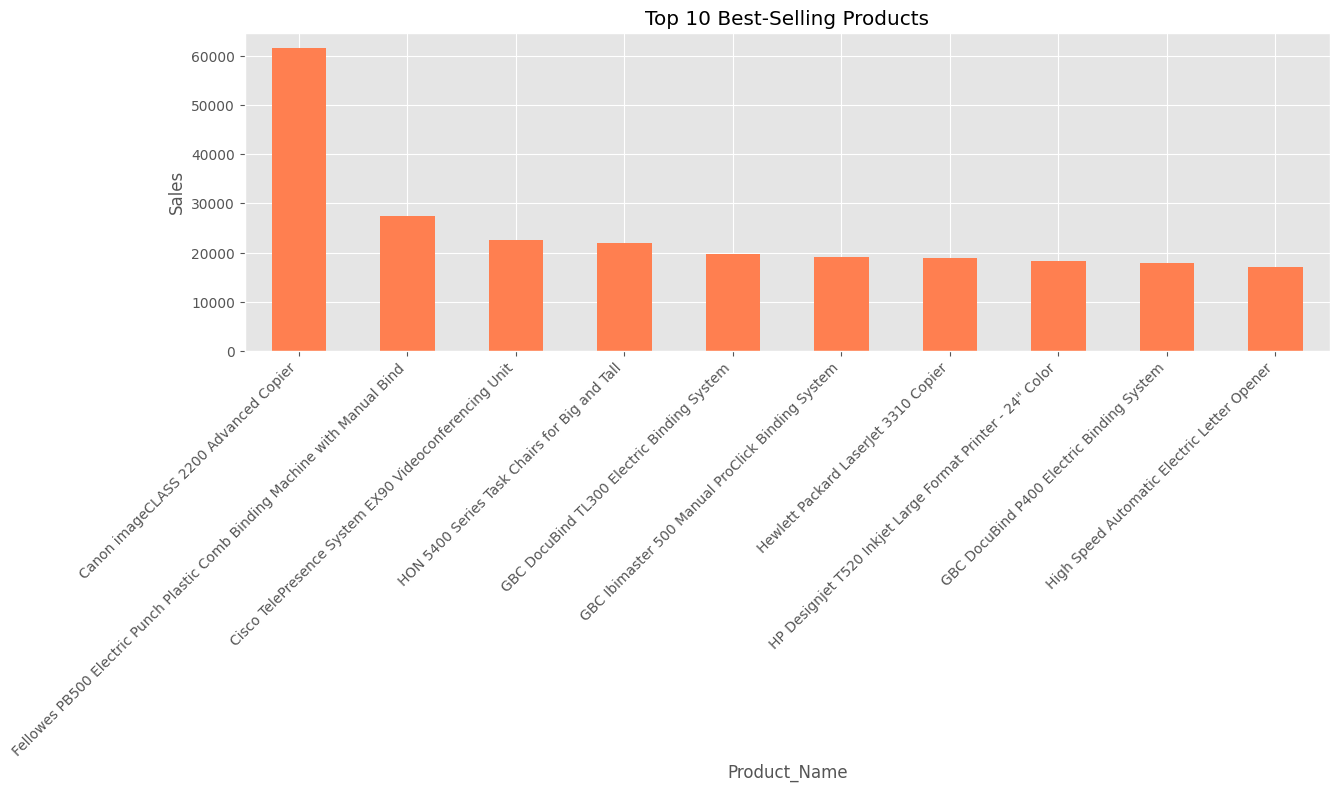

In [61]:
# 5. Top 10 Best-Selling Products
top_products = df.groupby('Product_Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(14,6))
top_products.plot(kind='bar', color='coral')

plt.title("Top 10 Best-Selling Products")
plt.ylabel("Sales")

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.35)  

plt.show()




## 7. SQL vs Pandas Comparison  
We replicate common SQL queries using Pandas.


In [62]:
# SQL: SELECT Category, SUM(Sales) FROM orders GROUP BY Category;
df.groupby('Category')['Sales'].sum()


Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [63]:
# SQL: SELECT * FROM orders WHERE Profit > 100;
df[df['Profit'] > 100].head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Profit_Margin,Month,Year,Shipping_Delay
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,0.3000,11,2016,3
13,14,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,0.3250,12,2016,5
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.0,240.2649,0.2300,9,2015,5
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,0.1125,12,2016,2
54,55,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,Phones,AT&T CL83451 4-Handset Telephone,1029.950,5,0.0,298.6855,0.2900,12,2016,6


In [64]:
# SQL: SELECT Product_Name, SUM(Sales) AS total_sales 
#      FROM orders GROUP BY Product_Name ORDER BY total_sales DESC LIMIT 5;

df.groupby('Product_Name')['Sales'].sum().nlargest(5)


Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

# 8. Business Insights  
### Key Findings:
- Technology category generates the highest sales.  
- West region is the most profitable.  
- Discounts above **0.3** reduce profit drastically.  
- Shipping delays average **3 days**.  
- A small number of products contribute to the majority of sales.  

---

### What the Business Should Do:
- Increase marketing on **Furniture** (low sales, moderate profit)  
- Reduce heavy discounts (hurts margins)  
- Improve shipping operations in regions with long delays  
- Promote top 10 best-selling products  
- Expand operations in **West** region  

---
